# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations
* 1. There is indeed a negative correlation between Latitude and Temperature. While the Northern and Southern hemisphere datasets are a bit small to show this correlation more fully, the full dataset demonstrates in a stronger way. My basis for this thinking is that the Norhern Hemisphere dataset is larger and shows the correlation more than the Southern hemisphere set.
* 2. No other weather condition measured contains a correlation that could truly be considered relevant in regards to Latitude.
* 3. An even larger dataset could be useful to solidify these observations more into the realm of fact. Or at least as factual as one can get when dealing with random subsets of data. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import requests
from config import weather_key
from citipy import citipy
import time 
import numpy as np
import random 
import scipy.stats as st

In [2]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities = []
units ="imperial"

## Generate Cities List

In [3]:
#Generate Longitudes, Latitudes, then Append the city names
for i in range(1500):
    Long = round(random.uniform(-180, 180), 2)
    Lat = round(random.uniform(-90, 90), 2)
    city = citipy.nearest_city(Lat, Long).city_name
    if city not in cities:
        cities.append(city)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Get weather data
counter = 0
name_city = []
longitude = []
latitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    try:
        query_url = url + "appid=" + weather_key + "&q=" + city + "&units=" + units
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        name_city.append(weather_json['name'])
        longitude.append(weather_json['coord']['lon'])
        latitude.append(weather_json['coord']['lat'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        counter += 1
        print(f'Retrieving data for {city}. This is city #{counter}.')
        time.sleep(1)
    except:
        print('Data not found. Moving along home.')
        continue

Retrieving data for nikolskoye. This is city #1.
Retrieving data for blagoveshchenka. This is city #2.
Retrieving data for port alfred. This is city #3.
Retrieving data for bengkulu. This is city #4.
Retrieving data for palmer. This is city #5.
Retrieving data for vila franca do campo. This is city #6.
Retrieving data for tura. This is city #7.
Retrieving data for busselton. This is city #8.
Retrieving data for faanui. This is city #9.
Retrieving data for saint-philippe. This is city #10.
Retrieving data for ushuaia. This is city #11.
Retrieving data for kangaatsiaq. This is city #12.
Retrieving data for mataura. This is city #13.
Retrieving data for kapaa. This is city #14.
Retrieving data for kodiak. This is city #15.
Retrieving data for cape town. This is city #16.
Retrieving data for albany. This is city #17.
Retrieving data for haines junction. This is city #18.
Retrieving data for borovoy. This is city #19.
Retrieving data for barrow. This is city #20.
Data not found. Moving alon

Retrieving data for carnarvon. This is city #158.
Data not found. Moving along home.
Retrieving data for lebu. This is city #159.
Retrieving data for chapais. This is city #160.
Retrieving data for namatanai. This is city #161.
Retrieving data for kabompo. This is city #162.
Retrieving data for tongliao. This is city #163.
Retrieving data for fortuna. This is city #164.
Retrieving data for constitucion. This is city #165.
Retrieving data for port hardy. This is city #166.
Retrieving data for san juan. This is city #167.
Retrieving data for lvov. This is city #168.
Retrieving data for hualmay. This is city #169.
Retrieving data for saquena. This is city #170.
Retrieving data for broken hill. This is city #171.
Data not found. Moving along home.
Retrieving data for evensk. This is city #172.
Retrieving data for zeya. This is city #173.
Retrieving data for qaanaaq. This is city #174.
Retrieving data for yokadouma. This is city #175.
Retrieving data for guayaramerin. This is city #176.
Ret

Retrieving data for sao paulo de olivenca. This is city #312.
Retrieving data for svetlogorsk. This is city #313.
Retrieving data for sobolevo. This is city #314.
Retrieving data for preobrazheniye. This is city #315.
Retrieving data for belmonte. This is city #316.
Retrieving data for port lincoln. This is city #317.
Retrieving data for vestmannaeyjar. This is city #318.
Retrieving data for north bend. This is city #319.
Retrieving data for vermillion. This is city #320.
Retrieving data for ondjiva. This is city #321.
Retrieving data for cape coast. This is city #322.
Retrieving data for kachiry. This is city #323.
Data not found. Moving along home.
Retrieving data for ponta do sol. This is city #324.
Retrieving data for manokwari. This is city #325.
Data not found. Moving along home.
Retrieving data for pangoa. This is city #326.
Retrieving data for lorengau. This is city #327.
Retrieving data for teya. This is city #328.
Retrieving data for malayal. This is city #329.
Retrieving dat

Retrieving data for cockburn town. This is city #470.
Data not found. Moving along home.
Retrieving data for verkhnevilyuysk. This is city #471.
Retrieving data for rundu. This is city #472.
Retrieving data for cabedelo. This is city #473.
Retrieving data for manuk mangkaw. This is city #474.
Retrieving data for daru. This is city #475.
Retrieving data for talnakh. This is city #476.
Retrieving data for valenza. This is city #477.
Retrieving data for jiangyou. This is city #478.
Data not found. Moving along home.
Retrieving data for rudnogorsk. This is city #479.
Retrieving data for azoyu. This is city #480.
Retrieving data for lafia. This is city #481.
Retrieving data for te anau. This is city #482.
Retrieving data for portland. This is city #483.
Retrieving data for washim. This is city #484.
Retrieving data for yumen. This is city #485.
Retrieving data for hamilton. This is city #486.
Retrieving data for vaitape. This is city #487.
Retrieving data for honningsvag. This is city #488.

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
data = {'City Name': name_city, 'Longitude': longitude, 'Latitude': latitude, 'Temperature (f)':max_temp, 'Humidity':humidity,\
       'Cloudiness': cloudiness, 'Wind Speed (mph)': wind_speed}
data_df = pd.DataFrame(data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
#Cut out Humidity Outliers
data_df[data_df['Humidity'] <= 100]

,City Name,Longitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
0,Nikolskoye,30.79,59.70,37.40,95,90,6.71
1,Blagoveshchenka,79.87,52.83,38.50,68,100,16.84
2,Port Alfred,26.89,-33.59,64.72,83,56,19.89
3,Bengkulu,102.27,-3.80,76.26,84,100,4.63
4,Palmer,-72.33,42.16,62.60,59,75,4.70
...,...,...,...,...,...,...,...
577,Santa Isabel Rio Negro,-65.02,-0.41,78.96,83,93,2.59
578,Turan,108.22,16.07,75.20,94,75,10.29
579,Dekar,21.93,-21.53,75.60,20,0,8.08
580,Batticaloa,81.69,7.71,77.81,80,31,4.21


In [30]:
#Push clean data set to CSV
data_df.to_csv('Output Data/weather_data.csv')

In [31]:
#Create Northern Hemisphere Dataframe
Northern_df = data_df[data_df['Latitude'] > 0]
Northern_df

,City Name,Longitude,Latitude,Temperature (f),Humidity,Cloudiness,Wind Speed (mph)
0,Nikolskoye,30.79,59.70,37.40,95,90,6.71
1,Blagoveshchenka,79.87,52.83,38.50,68,100,16.84
4,Palmer,-72.33,42.16,62.60,59,75,4.70
5,Vila Franca do Campo,-25.43,37.72,57.20,87,40,10.29
6,Tura,90.22,25.52,71.49,88,0,3.18
...,...,...,...,...,...,...,...
574,Seoul,126.98,37.57,48.20,100,1,2.06
575,Ibrā’,58.53,22.69,72.75,17,54,5.79
576,Don Luan,106.92,11.53,73.33,98,100,2.28
578,Turan,108.22,16.07,75.20,94,75,10.29


In [32]:
#Create Southern Hemisphere Dataframe
Southern_df = data_df[data_df['Latitude'] < 0]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

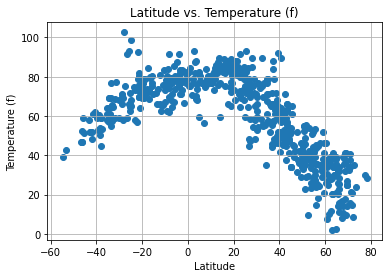

In [33]:
#Overall Latitude vs Temperature
Lattemp = data_df['Latitude']
Templat = data_df['Temperature (f)']
plt.scatter(Lattemp, Templat)
plt.xlabel('Latitude')
plt.ylabel('Temperature (f)')
plt.title('Latitude vs. Temperature (f)')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Temp_vs_Lat.png')

## Latitude vs. Humidity Plot

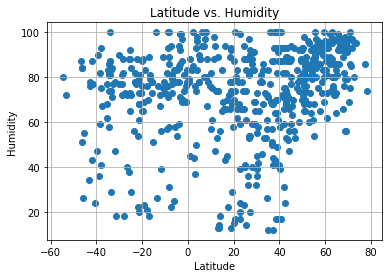

In [25]:
#Overall Latitude vs Humidity
Lathum = data_df['Latitude']
Humlat = data_df['Humidity']
plt.scatter(Lathum, Humlat)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Humidity_vs_Lat.png')

## Latitude vs. Cloudiness Plot

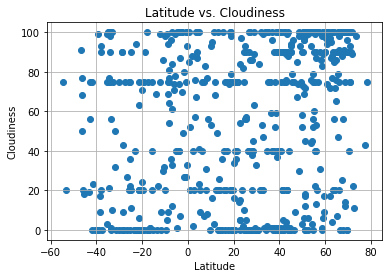

In [24]:
#Overall Latitude vs Cloudiness
Latcloud = data_df['Latitude']
Cloudlat = data_df['Cloudiness']
plt.scatter(Latcloud, Cloudlat)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Cloudiness_vs_Lat.png')

## Latitude vs. Wind Speed Plot

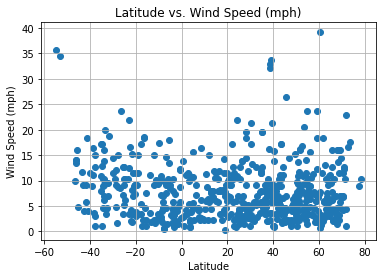

In [23]:
#Overall Latitude vs Wind Speed
Latwind = data_df['Latitude']
Windlat = data_df['Wind Speed (mph)']
plt.scatter(Latwind, Windlat)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')
plt.grid(True)
# Save the figure.
plt.savefig('Images/Windspeed_vs_Lat.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7542809286231897


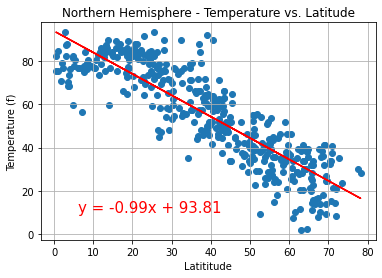

In [14]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Temperature (f)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Temp_vs_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.48603400003740527


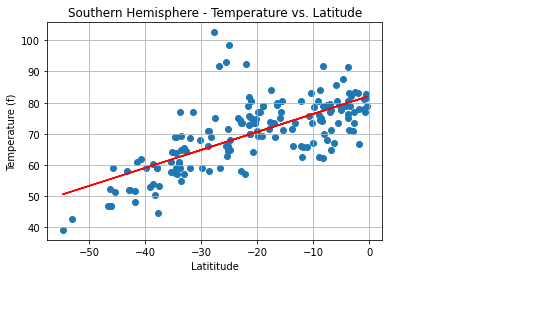

In [15]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Temperature (f)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Temp_vs_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10525483490490957


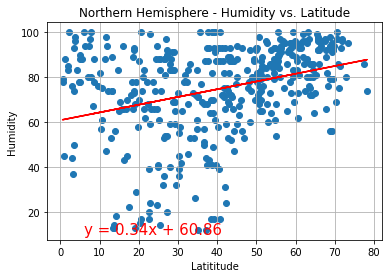

In [16]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Humidity')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Humidity_vs_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.021928431463881244


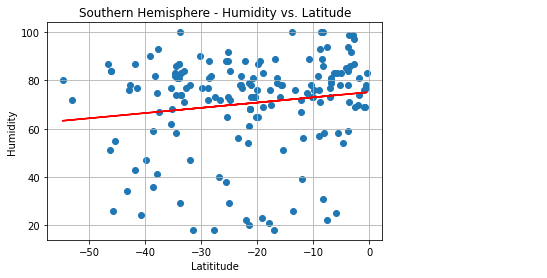

In [17]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Humidity')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Humidity_vs_Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.062100324523178076


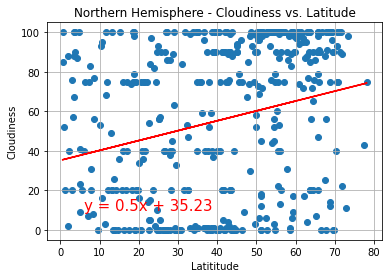

In [18]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Cloudiness')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Cloud_vs_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02472602395720845


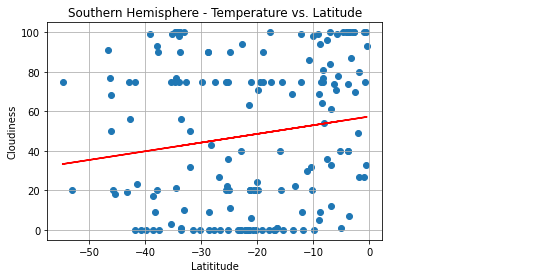

In [19]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,5]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Cloudiness')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Cloud_vs_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0052450859168010865


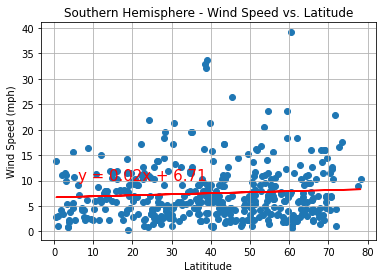

In [20]:
#Set Stuff
xvalues = Northern_df.iloc[:,2]
yvalues = Northern_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/North_Wind_vs_Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15535736130084332


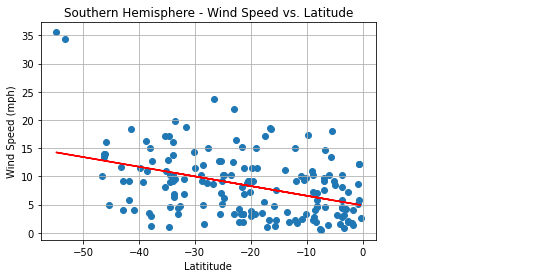

In [22]:
#Set Stuff
xvalues = Southern_df.iloc[:,2]
yvalues = Southern_df.iloc[:,6]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " +str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(xvalues,yvalues)
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color='red')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latititude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
print(f"The r-squared is: {rvalue**2}")
# Save the figure.
plt.savefig('Images/South_Wind_vs_Lat.png')